# Nephron AI
## Fighting chronic kidney disease using deep learning and fuzzy logic

Chronic kidney disease, or CKD, causes more deaths than breast cancer or prostate cancer. It is the under-recognized public health crisis. It affects an estimated 37 million people in the U.S. (15% of the adult population; more than 1 in 7 adults) and approximately 90% of those with CKD don’t even know they have it. 1 in 3 American adults (approximately 80 million people) is at risk for CKD. CKD is more common in women (15%) than men (12%). CKD is the 9th leading cause of death in the U.S. In 2016, over 500,000 patients received dialysis treatment, and over 200,000 lived with a kidney transplant.

**NephronAI** works in three steps
- Predict the disease
- Predict the cause
- Recovery strategy

**For the prediction of the disease**, we are using a deep learning neural network built on PyTorch that yields more than 99.6% acduracy. Actual model is deployed on Azure Machine Learning.

### Why are we using PyTorch?
The primary reason is that PyTorch uses dynamic computation graphs while Tensorflow (or Keras, or Theano) uses static graphs.Its favoured in research and we are using it for the same purpose.

## Step -1 Importing data

We are using a data set provided by Apollo Hospitals Chennai available publicly on the internet. For more information or resource links refer to the GitHub repository [https://github.com/ayushanand18/nephron-ai](https://github.com/ayushanand18/nephron-ai)

Before, we import our cleaned and feature selected data let us look at the original dataset and explore the correlation between various parameters. We have later put on a Chi-2 feature selection and MICE algorithm for cleaning in Microsoft Azure Machine Learning platform. It is easier and faster

In [124]:
import pandas as pd

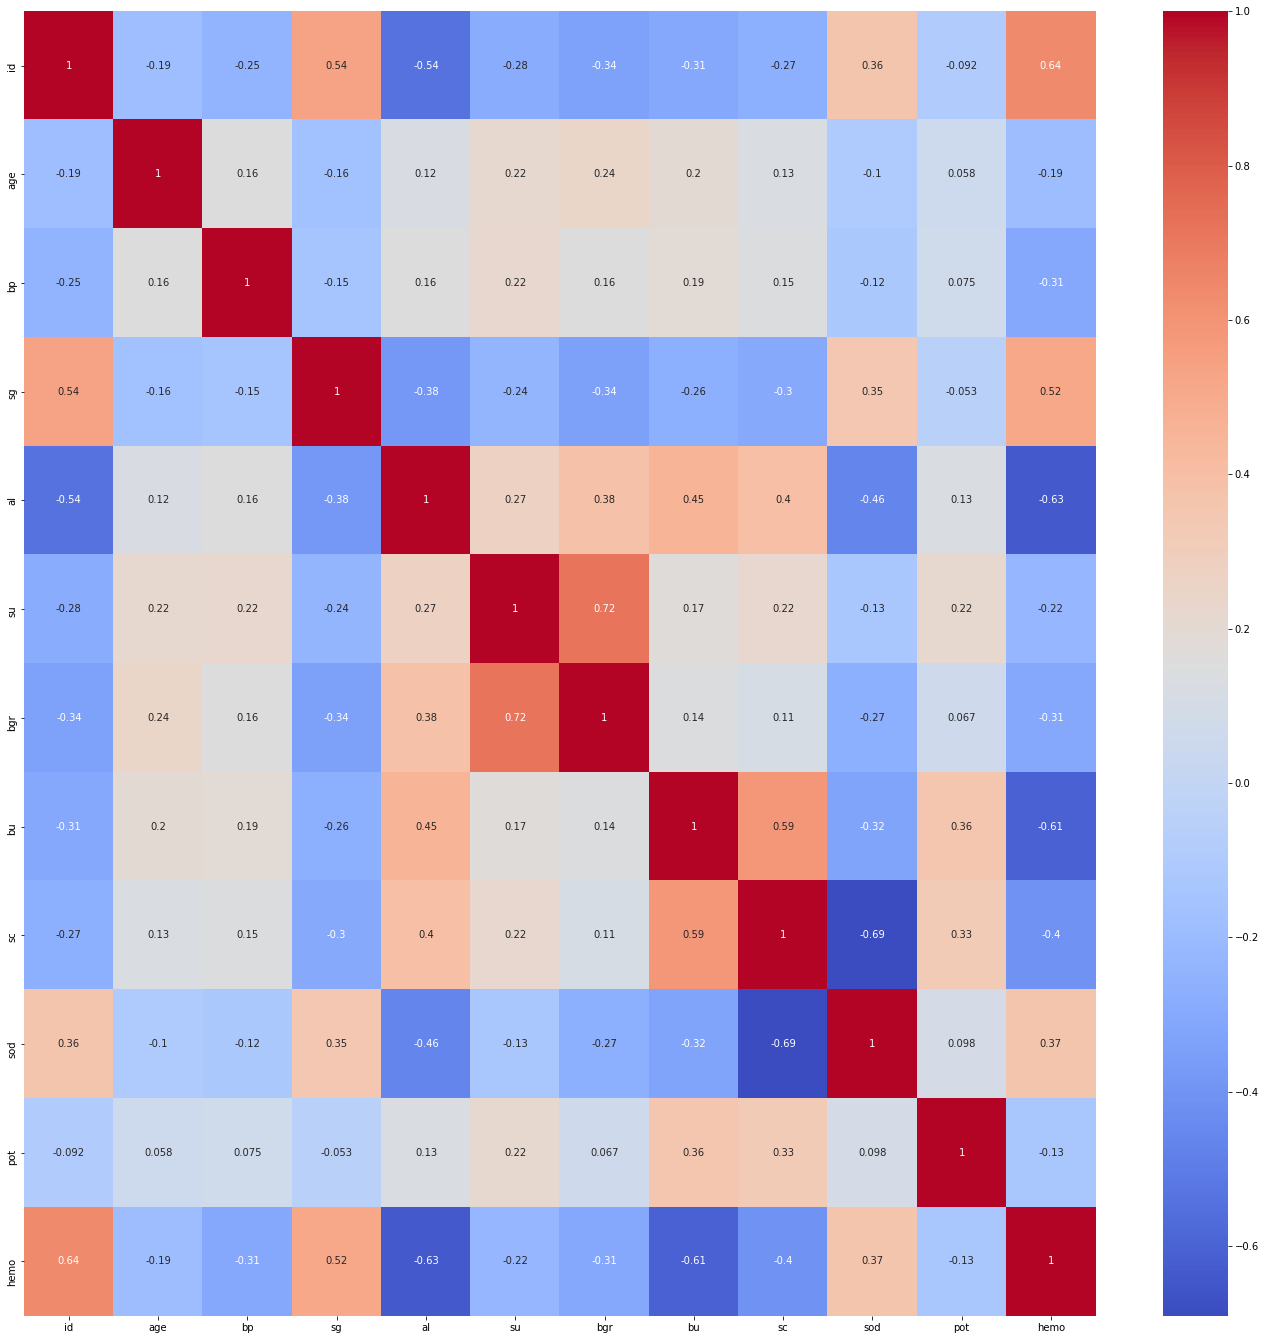

In [125]:
dataorig = pd.read_csv('../data/ChronicKidneyDiseaseData - OriginalData.csv')
import matplotlib.pyplot as plt
import seaborn as sns
dataorig = pd.DataFrame(data=dataorig).replace('yes',True)
plt.figure(figsize = (24,24))
sns.heatmap(dataorig.corr(), annot = True, cmap = 'coolwarm') # looking for strong correlations with "classification" row
plt.show()

In [126]:
data = pd.read_csv('../data/Chronic Kidney Disease Data - Feature Selected & Cleaned MICE (Original).csv', header='infer')
df=pd.DataFrame(data)

In [127]:
df.head(10)

,classification,hemo,sc,pcv,al,rc,htn,sg,dm,sod
0,ckd,15.4,1.2,44.0,1.0,5.200000,yes,1.02,yes,146.657867
1,ckd,11.3,0.8,38.0,4.0,4.686921,no,1.02,no,151.385254
2,ckd,9.6,1.8,31.0,2.0,4.114644,no,1.01,yes,130.725586
3,ckd,11.2,3.8,32.0,4.0,3.900000,yes,1.01,no,111.000000
4,ckd,11.6,1.4,35.0,2.0,4.600000,no,1.01,no,137.998795
5,ckd,12.2,1.1,39.0,3.0,4.400000,yes,1.02,yes,142.000000
6,ckd,12.4,24.0,36.0,0.0,4.188086,no,1.01,no,104.000000
7,ckd,12.4,1.1,44.0,2.0,5.000000,no,1.02,yes,146.358780
8,ckd,10.8,1.9,33.0,3.0,4.000000,yes,1.02,yes,140.041412
9,ckd,9.5,7.2,29.0,2.0,3.700000,yes,1.02,yes,114.000000


Let's look at the data. We are using seaborn library for visualizing using *pairplot*.

In [128]:
df.replace('yes',True)

,classification,hemo,sc,pcv,al,rc,htn,sg,dm,sod
0,ckd,15.4,1.2,44.0,1.0,5.200000,True,1.02,True,146.657867
1,ckd,11.3,0.8,38.0,4.0,4.686921,no,1.02,no,151.385254
2,ckd,9.6,1.8,31.0,2.0,4.114644,no,1.01,True,130.725586
3,ckd,11.2,3.8,32.0,4.0,3.900000,True,1.01,no,111.000000
4,ckd,11.6,1.4,35.0,2.0,4.600000,no,1.01,no,137.998795
...,...,...,...,...,...,...,...,...,...,...
395,notckd,15.7,0.5,47.0,0.0,4.900000,no,1.02,no,150.000000
396,notckd,16.5,1.2,54.0,0.0,6.200000,no,1.03,no,141.000000
397,notckd,15.8,0.6,49.0,0.0,5.400000,no,1.02,no,137.000000
398,notckd,14.2,1.0,51.0,0.0,5.900000,no,1.03,no,135.000000


## Step - 2 Data Cleaning

First we will encode the category columns based on our own schema, and convert classes into numeric type which is recognisable. We will also remove any NaNs (missing values) from the data. We will be doing this all using the *Pandas library*.

In [129]:
#cleaning the data - replacing yes with 1 and no with 0 in pandas dataframe
df['htn'] = df['htn'].replace('yes',True) #htn column
df['htn'] = df['htn'].replace('no',False)  #htn coloumn
df['dm'] = df['dm'].replace('yes',True)   #dm column
df['dm'] = df['dm'].replace('no',False)    #dm column

df['classification'] = df['classification'].replace('ckd',True)  #ckd = True
df['classification'] = df['classification'].replace('notckd',False)  #notckd = False
df = df.fillna(0) #removing any NaNs
#seeing the cleaned data
df

,classification,hemo,sc,pcv,al,rc,htn,sg,dm,sod
0,True,15.4,1.2,44.0,1.0,5.200000,True,1.02,True,146.657867
1,True,11.3,0.8,38.0,4.0,4.686921,False,1.02,False,151.385254
2,True,9.6,1.8,31.0,2.0,4.114644,False,1.01,True,130.725586
3,True,11.2,3.8,32.0,4.0,3.900000,True,1.01,False,111.000000
4,True,11.6,1.4,35.0,2.0,4.600000,False,1.01,False,137.998795
...,...,...,...,...,...,...,...,...,...,...
395,False,15.7,0.5,47.0,0.0,4.900000,False,1.02,False,150.000000
396,False,16.5,1.2,54.0,0.0,6.200000,False,1.03,False,141.000000
397,False,15.8,0.6,49.0,0.0,5.400000,False,1.02,False,137.000000
398,False,14.2,1.0,51.0,0.0,5.900000,False,1.03,False,135.000000


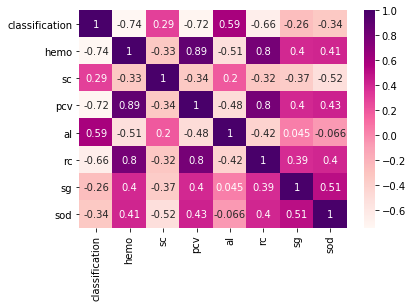

In [130]:
import seaborn as sb
#sns.pairplot(df,hue="classification")
plt.figure()
sns.heatmap(data.corr(), annot = True, cmap='RdPu') 
plt.show()

In [131]:
import numpy as np

Now, let us import some basic dependencies for creatinng and training our model using PyTorch and evaluate and serialize deta using sklearn.

In [132]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from torch import from_numpy as totensor

from sklearn.preprocessing import StandardScaler    
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

The **classification** column is the target for our model, and so shall we change into a category and encode it to numeric classes.

In [133]:
df['classification'] = df['classification'].astype('category')
encode_map = {
    'ckd': 1,
    'notckd': 0
}

df['classification'].replace(encode_map, inplace=True)

In [134]:
X = df.iloc[:, 1:10]
y = df.iloc[:, 0:1]
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.30, random_state=70)
#splitting the test data and train data randomly from the input. Train data = 70% of all samples.

In [135]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [136]:
#Now let us define the parameters of our training
EPOCHS = 150
BATCH_SIZE = 32
LEARNING_RATE = 0.0001

In [137]:
## First we wll convert them into numpy array and then into PyTorch Tensors
xx,yy=np.array(X_train, dtype='float32'),np.array(Y_train, dtype='float32')

In [138]:
## train data
class CustomDataset(Dataset):
    
    def __init__(self, X_data, y_data):
        self.X_data = X_data
        self.y_data = y_data
        
    def __getitem__(self, index):
        return self.X_data[index], self.y_data[index]
        
    def __len__ (self):
        return len(self.X_data)

xx,yy = torch.FloatTensor(xx), torch.FloatTensor(yy)
train_data = CustomDataset(xx,yy)
## test data    
class testData(Dataset):
    def __init__(self, X_data, y_data):
        self.X_data = X_data
        self.y_data = y_data
    def __getitem__(self, index):
        return self.X_data[index], self.y_data[index]
    def __len__ (self):
        return len(self.X_data)

test_data = CustomDataset(torch.FloatTensor(X_test), torch.FloatTensor(np.array(Y_test, dtype='float32')))

Let us now use the data loader which we created in the previous block.

In [139]:
train_loader = DataLoader(dataset=train_data, batch_size=BATCH_SIZE, shuffle=True)
test_loader = DataLoader(dataset=test_data, batch_size=1)

Here, we are defining the architecture of our model. We are going to have a 9-(32-32)-1 Neural network with 2 batch normalization, a drouput layer and relu as the activation function.

In [140]:
class Perceptron(torch.nn.Module):
    def __init__(self):
        super(Perceptron, self).__init__()
        self.layer_1 = nn.Linear(9, 32) 
        self.layer_2 = nn.Linear(32, 32)
        self.layer_out = nn.Linear(32, 1) 
        
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(p=0.1)
        self.batchnorm1 = nn.BatchNorm1d(32)
        self.batchnorm2 = nn.BatchNorm1d(32)
    def forward(self, x):
        x = self.relu(self.layer_1(x))
        x = self.batchnorm1(x)
        x = self.relu(self.layer_2(x))
        x = self.batchnorm2(x)
        x = self.dropout(x)
        x = self.layer_out(x)
        return x

In [141]:
model = Perceptron()
print(model)
criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE)

Perceptron(
  (layer_1): Linear(in_features=9, out_features=32, bias=True)
  (layer_2): Linear(in_features=32, out_features=32, bias=True)
  (layer_out): Linear(in_features=32, out_features=1, bias=True)
  (relu): ReLU()
  (dropout): Dropout(p=0.1, inplace=False)
  (batchnorm1): BatchNorm1d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (batchnorm2): BatchNorm1d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
)


In [142]:
## Now let us define the accuracy calculation function
def binary_acc(y_pred, y_test):
    y_pred_tag = torch.round(torch.sigmoid(y_pred))

    correct_results_sum = (y_pred_tag == y_test).sum().float()
    acc = correct_results_sum/y_test.shape[0]
    acc = torch.round(acc * 100)
    
    return acc

## Step 3 Model Training
Now we will turn into the train mode, and train the model.

First we will store the loss and accuracy over each epoch in a list.

In [143]:
losslist,acclist= [0],[0]

In [144]:
model.train()
for e in range(1, EPOCHS+1):
    epoch_loss = 0
    epoch_acc = 0
    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()
        
        y_pred = model(X_batch)
        
        loss = criterion(y_pred, y_batch)
        acc = binary_acc(y_pred, y_batch)
        
        loss.backward()
        optimizer.step()
        
        epoch_loss += loss.item()
        epoch_acc += acc.item()
        
    print('Epoch {}: | Loss: {}:'.format(e+0,epoch_loss/len(train_loader)))
    print('Acc: {}'.format(epoch_acc/len(train_loader)))
    losslist.append(epoch_loss/len(train_loader))
    acclist.append(epoch_acc/len(train_loader))

Epoch 1: | Loss: 0.8917749921480814:
Acc: 20.666666666666668
Epoch 2: | Loss: 0.8812783161799113:
Acc: 23.555555555555557
Epoch 3: | Loss: 0.8355255524317423:
Acc: 29.11111111111111
Epoch 4: | Loss: 0.79130529695087:
Acc: 35.44444444444444
Epoch 5: | Loss: 0.7546338637669882:
Acc: 39.55555555555556
Epoch 6: | Loss: 0.738815512922075:
Acc: 42.111111111111114
Epoch 7: | Loss: 0.7030414011743333:
Acc: 51.44444444444444
Epoch 8: | Loss: 0.6730188131332397:
Acc: 53.44444444444444
Epoch 9: | Loss: 0.6567061344782511:
Acc: 54.55555555555556
Epoch 10: | Loss: 0.6283119387096829:
Acc: 64.77777777777777
Epoch 11: | Loss: 0.5984567602475485:
Acc: 70.44444444444444
Epoch 12: | Loss: 0.570002105500963:
Acc: 77.44444444444444
Epoch 13: | Loss: 0.5547709597481622:
Acc: 80.22222222222223
Epoch 14: | Loss: 0.5385960737864176:
Acc: 80.0
Epoch 15: | Loss: 0.5308392941951752:
Acc: 83.33333333333333
Epoch 16: | Loss: 0.5071444312731425:
Acc: 85.44444444444444
Epoch 17: | Loss: 0.48479705717828536:
Acc: 88.

We can see that the loss has reduced repeatedly and the train accuracy booming to 99.6% Now we will test the model over a test data. Let us now visualize the loss and accuracy data on a line plot.

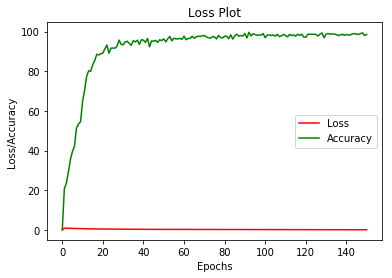

In [145]:
x = range(len(losslist))
plt.plot(x,losslist, label="Loss", color='r')
plt.plot(x,acclist, label="Accuracy", color='g')
plt.xlabel("Epochs")
plt.ylabel("Loss/Accuracy")
plt.title("Loss Plot")
plt.legend()
plt.show()

In [146]:
model.eval()
tp,tn,fp,fn=0,0,0,0

for x,y in test_loader:
    if torch.round(torch.sigmoid(loadmodel(x)))==y and y[0][0]==1.:
        tp +=1
    elif torch.round(torch.sigmoid(loadmodel(x)))==y and y[0][0]==0.:
        tn+=1
    elif torch.round(torch.sigmoid(loadmodel(x)))!=y and y[0][0]==1.:
        fn+=1
    elif torch.round(torch.sigmoid(loadmodel(x)))!=y and y[0][0]==0.:
        fp+=1
print([[tp,fp],[fn,tn]])
print('\n---------------------------------\n')
print('Validation accuracy = \t'+str((tp+tn)/(tp+tn+fp+fn)*100)+'%')

[[74, 1], [1, 44]]

---------------------------------

Validation accuracy = 	98.33333333333333%


Above we can see from the test data (which is unseen to the model before),
True Positive    =  73,
False Positives  =   0,
False Negatives  =   2,
True Negatives   =  45.

And the valiation accuracy = 98.33%

## Saving and loading our model

Now, we have seen that the accuracy is awesome over both training and test data we will save this model so that we can use it anytime in future. After saving we can easily make a checkpoint at this stage, and run the following cells without initializing again by just loading our saved model!

In [147]:
#torch.save(model,'nephron-ai-model.pth')

Now, let us load our existing saved model.

In [148]:
loadmodel = torch.load('nephron-ai-model.pth')
loadmodel.eval()

Perceptron(
  (layer_1): Linear(in_features=9, out_features=32, bias=True)
  (layer_2): Linear(in_features=32, out_features=32, bias=True)
  (layer_out): Linear(in_features=32, out_features=1, bias=True)
  (relu): ReLU()
  (dropout): Dropout(p=0.1, inplace=False)
  (batchnorm1): BatchNorm1d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (batchnorm2): BatchNorm1d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
)